In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.animation as animation
from IPython.display import HTML
from skimage import draw
%matplotlib inline
#comment

In [4]:
def plot_images(img_list):
    def init():
        img.set_data(img_list[0])
        return (img,)

    def animate(i):
        img.set_data(img_list[i])
        return (img,)

    plt.figure(figsize = (15,15))
    fig = plt.figure()
    ax = fig.gca()
    img = ax.imshow(img_list[0])
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                 frames=len(img_list), interval=20, blit=True)
    return anim


In [5]:
class World():
    def __init__(self,rocket,target,width=768,height=640,stop_limit=100):
        self.rocket = rocket
        self.target = target
        self.width = width
        self.height = height
        self.time = 0
        self.stop_limit = stop_limit
        self.worlds = [np.ones((width,height),dtype=np.uint8)]
        self.distance = []


    def gen_img(self,world):
        buff = np.array((world,world,world))*255
        return buff.reshape(self.width,self.height,3)

    def run(self):
        print("Run the world")

        while True:
            self.time = self.time + 1
            xt,yt = self.target.move(self.time)
            xr,yr = self.rocket.move(self.time,self.target)
            self.distance.append(np.linalg.norm(np.array([xt,yt])-np.array([xr,yr])))
            rt, ct = draw.disk((int(xt), int(yt)), radius=10) #, shape=self.worlds[-1].shape)
            self.worlds[-1][rt,ct]=0
            rr, cr = draw.disk((int(xr), int(yr)), radius=10) #, shape=self.worlds[-1].shape)
            self.worlds[-1][rr,cr]=0
            self.worlds.append(np.ones((self.width,self.height),dtype=np.uint8))
            if self.time>self.stop_limit:
                print(len(self.worlds))
                print("Stop the world")
                break
            if self.distance[-1]<10:
                print("Grac!")
                break
        return self.worlds


In [6]:
class Target():
    def __init__(self,r1,f1,r2,f2,x0,y0):
        self.x0 = x0
        self.y0 = y0
        self.r1 = r1
        self.f1 = f1
        self.r2 = r2
        self.f2 = f2
        self.move(0)

    def move(self,time):
        self.x = self.x0 + self.r1 * np.cos(time*2*np.pi*self.f1) + self.r2 * np.cos(time*2*np.pi*self.f2)
        self.y = self.y0 + self.r1 * np.sin(time*2*np.pi*self.f1) + self.r2 * np.sin(time*2*np.pi*self.f2)
        return (self.x,self.y)

class RectRocket():
    def __init__(self,x0,y0,v,angle):
        self.x = x0
        self.y = y0
        self.v = v
        self.angle = angle
        
        self.memory = []
        self.memory_cnt = 20

    def move(self, time: int, target: Target):
        # Put your code here
        # Calculate your angle and apply it to new (x,y) coords
        # Steps:
        # 1. Calculate alpha angle
        # 2. Calcualte new_coordinates

        self.memory.append((target.x, target.y))
        
        if self.memory_cnt > 0:
            self.memory_cnt -= 1
            self.x -= self.v
            #print(self.y)
            return (self.x, self.y)
            
        dx = self.memory[9][0] - self.memory[0][0]
        dy = self.memory[9][1] - self.memory[0][1]

        arctan = -np.arctan(dy / dx)

        #arctan = np.pi 
        
        self.x = (self.x - self.v * np.cos(arctan - (2/3) * np.pi))
        self.y = (self.y - self.v * np.sin(arctan))
        
        return (self.x, self.y)

In [7]:
# Я пытался сделать "умный" алгоритм, но не вышло...
# class Target():
#     def __init__(self,r1,f1,r2,f2,x0,y0):
#         self.x0 = x0
#         self.y0 = y0
#         self.r1 = r1
#         self.f1 = f1
#         self.r2 = r2
#         self.f2 = f2
#         self.move(0)
# 
#     def move(self,time):
#         self.x = self.x0 + self.r1 * np.cos(time*2*np.pi*self.f1) + self.r2 * np.cos(time*2*np.pi*self.f2)
#         self.y = self.y0 + self.r1 * np.sin(time*2*np.pi*self.f1) + self.r2 * np.sin(time*2*np.pi*self.f2)
#         return (self.x,self.y)
# 
# class RectRocket():
#     def __init__(self,x0,y0,v,angle):
#         self.x = x0
#         self.y = y0
#         self.v = v
#         self.angle = angle
#         
#         self.memory = []
#         self.coord_diff = []
#         self.memory_cnt_const = 5
#         self.memory_cnt = self.memory_cnt_const
# 
#         self.memory_time = 0
#         
#         self.flag = True
# 
#     def move(self, time: int, target: Target):
#         self.memory.append((target.x, target.y))
# 
#         if len(self.memory) > 1:
#             dx = rocket.memory[-1][0] - rocket.memory[-2][0]
#             dy = rocket.memory[-1][1] - rocket.memory[-2][1]
#     
#             self.coord_diff.append((dx > 0, dy > 0))
# 
#             if len(self.coord_diff) > 1 and self.coord_diff[-1] != self.coord_diff[-2]:
#                 print('Смена четверти!', time)
#                 self.memory_cnt = self.memory_cnt_const
#         
#         if self.memory_cnt > 0:
#             self.memory_cnt -= 1
#             self.memory_time = time
#             print(f'xxx {time}')
# 
#             self.angle = np.arctan2(self.x - target.x, self.y - target.y)
#             self.x = (self.x - self.v * np.cos(self.angle)) % 630
#             self.y = (self.y - self.v * np.sin(self.angle)) % 630
#             return (self.x, self.y)
#         
#         dx = rocket.memory[self.memory_time][0] - rocket.memory[self.memory_time - self.memory_cnt_const - 1][0]
#         dy = rocket.memory[self.memory_time][1] - rocket.memory[self.memory_time - self.memory_cnt_const - 1][1]
# 
#         self.angle = np.arctan2(dy, dx) + np.pi * self.coord_diff[-1][0]
#         self.x = (self.x - self.v * np.cos(self.angle)) % 630
#         self.y = (self.y - self.v * np.sin(self.angle)) % 630
# 
#         return (self.x, self.y)

Run the world
Grac!


<Figure size 1500x1500 with 0 Axes>

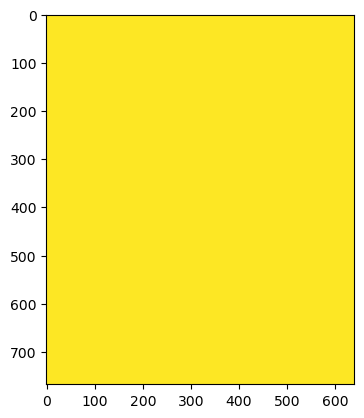

In [8]:
rocket = RectRocket(600,320,5, 0)
target = Target(250,0.01,5,0.01,400,320)
world = World(rocket,target)


HTML(plot_images(world.run()).to_html5_video())
#animation = plot_images(world.run())
#anim.save('animation.mp4', writer='ffmpeg')
#animation.save('animation.mp4', writer='ffmpeg')


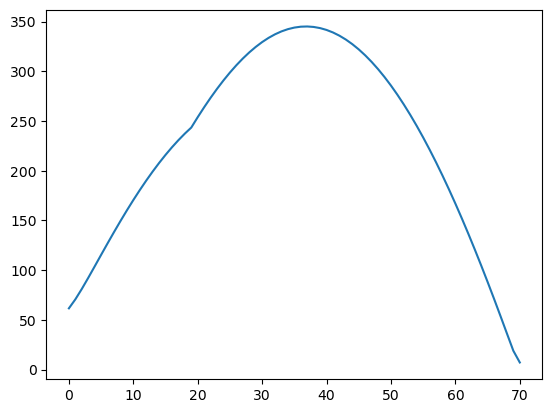

In [10]:
plt.plot(world.distance)

In [39]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [18]:
list(range(10))[-10]

0